# 3. Hadamard Test

In [4]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from numpy import pi
import numpy as np
import matplotlib.pyplot as plt

In [5]:
angle = 0.5625 # Exact value of theta to estimate
shots = 1000 # number of times each circuit is run
print("Angle: ",angle, "rad")

Angle:  0.5625 rad


In [6]:
def re_HT(theta):
    circuit = QuantumCircuit(2,1) # Create circuit with 2 qubits and 1 classical bit
    circuit.x(1) # Apply pauli-x gate to q1 to put it to 1 state
    circuit.barrier(label='$|π_0$\u27e9')    
    circuit.h(0) # Apply hadamard gate to q0 to put it into + state
    circuit.barrier(label='$|π_1$\u27e9') 
    circuit.cp(theta,0,1) # rotates q1 theta radians if q0 is 1
    circuit.barrier(label='$|π_2$\u27e9') 
    circuit.h(0) # Apply second hadamard gate to q0 to ensure the value phi affects our output
    circuit.barrier(label='$|π_3$\u27e9')
    circuit.measure(0,0) # Measure q0
    return circuit

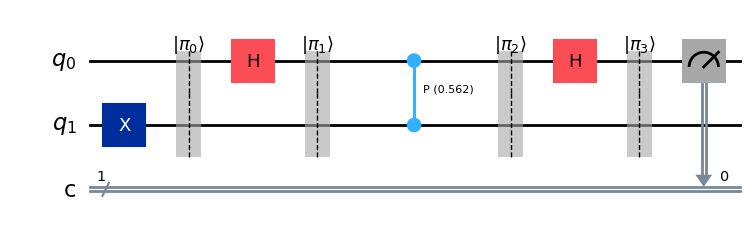

In [7]:
qcRe = re_HT(angle)
qcRe.draw('mpl')

In [8]:
def im_HT(theta):
    circuit = QuantumCircuit(2,1) #Create circuit with 2 qubits and 1 classical bit
    circuit.x(1) #Apply pauli-x gate to q1 to put it to 1 state
    circuit.barrier(label='$|π_0\u27e9$')
    circuit.h(0) #Apply hadamard gate to q0 to put it into + state
    circuit.barrier(label='$|π_1$\u27e9')
    circuit.sdg(0) #Apply phase gate to make imaginary
    circuit.barrier(label='$|π_2$\u27e9')
    circuit.cp(theta,0,1) #Rotates q0 2*pi*theta radians if q1 is 1
    circuit.barrier(label='$|π_3$\u27e9')
    circuit.h(0) #Apply second hadamard gate to q0 to ensure the value phi affects our output
    circuit.barrier(label='$|π_4$\u27e9')
    circuit.measure(0,0) #Measure q0
    return circuit

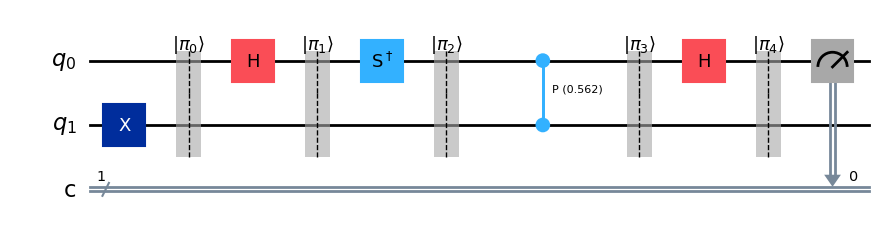

In [9]:
qcIm = im_HT(angle)
qcIm.draw('mpl')

In [10]:
sim = AerSimulator() # set simulator

In [11]:
transRe = transpile(qcRe, sim) # transpile real hadamard test circuit
resultRe = sim.run(transRe, shots = shots).result() # run transpiled circuit
countsRe = resultRe.get_counts() # retreive counts after measurement

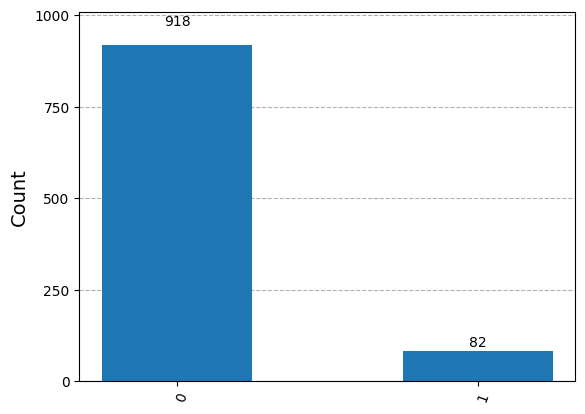

In [12]:
plot_histogram(countsRe) # plot real counts

In [13]:
transIm = transpile(qcIm, sim) # transpile imaginary hadamard test circuit
resultIm = sim.run(transIm, shots = shots).result() # run transpiled circuit
countsIm = resultIm.get_counts() # retreive counts after measurement

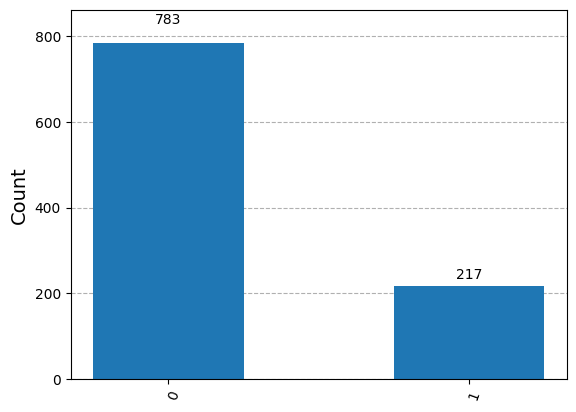

In [14]:
plot_histogram(countsIm) # plot imaginary counts

In [15]:
print('For Real Part:\nCalculated probability of measuring 0:\t',0.5*(1 + np.cos(angle)))
print('Calculated probability of measuring 1:\t', 0.5*(1 - np.cos(angle)))

print('Probability of measuring 0:\t\t', countsRe['0']/shots)
print('Probability of measuring 1:\t\t', countsRe['1']/shots)

print('\nFor Imaginary Part:\nCalculated probability of measuring 0:\t',0.5*(1 + np.sin(angle)))
print('Calculated probability of measuring 1:\t', 0.5*(1 - np.sin(angle)))

print('Probability of measuring 0:\t\t', countsIm['0']/shots)
print('Probability of measuring 1:\t\t', countsIm['1']/shots)

For Real Part:
Calculated probability of measuring 0:	 0.922962249615534
Calculated probability of measuring 1:	 0.07703775038446603
Probability of measuring 0:		 0.918
Probability of measuring 1:		 0.082

For Imaginary Part:
Calculated probability of measuring 0:	 0.7666513367680101
Calculated probability of measuring 1:	 0.23334866323198994
Probability of measuring 0:		 0.783
Probability of measuring 1:		 0.217


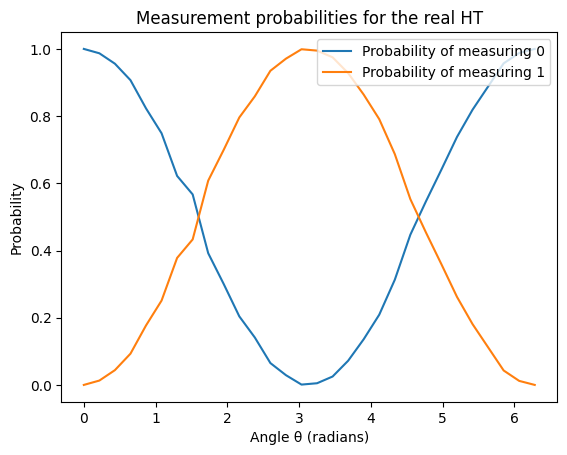

In [16]:
angles = np.linspace(0, 2*pi, 30) # create array of evenly spaced angles from 0 - 2 pi
prob0 = []
prob1 = []
for ang in angles:
    circ = re_HT(ang)
    shots = int(shots)
    trans = transpile(circ, sim) # transpile real hadamard test circuit
    result = sim.run(trans, shots = shots).result() # run transpiled circuit
    counts = result.get_counts() # retreive counts after measurement
    prob0val = counts.get('0')
    prob1val = counts.get('1')
    # compute probabilities from counts and append to a list
    if prob0val is not None and prob1val is not None:        
        prob0.append(counts['0']/shots)
        prob1.append(counts['1']/shots)
    elif prob0val is None:
        prob0.append(0)
        prob1.append(counts['1']/shots)
    elif prob1val is None:
        prob1.append(0)
        prob0.append(counts['0']/shots)
plt.plot(angles, prob0, label = 'Probability of measuring 0')
plt.plot(angles, prob1, label = 'Probability of measuring 1')
plt.xlabel('Angle \u03B8 (radians)')
plt.ylabel('Probability')
plt.title('Measurement probabilities for the real HT')
plt.legend(loc = 'upper right')
plt.show()

In [17]:
print("Results of the Trial: ") # display counts for both circuits
print("Real Circuit:  \t",countsRe)
print("Imginary Circuit:\t",countsIm)

# obtain probabilities from counts
re_p0 = countsRe['0']/shots
re_p1 = countsRe['1']/shots
im_p0 = countsIm['0']/shots
im_p1 = countsIm['1']/shots

# compute the real and imaginary expectation values
# any of the commented equations can be used
re = re_p0 - re_p1
#re = 2*(re_p0) - 1
#re = 1 - 2*(re_p1)

im = im_p0 - im_p1
#im = 2*(im_p0) - 1
#im = 1 - 2*(im_p1)

print('\nRe\u27e8\u03c8|U|\u03c8\u27e9 = ',re) # display both the real and imaginary expectation values 
print('Im\u27e8\u03c8|U|\u03c8\u27e9 = ',im)

Results of the Trial: 
Real Circuit:  	 {'0': 918, '1': 82}
Imginary Circuit:	 {'0': 783, '1': 217}

Re⟨ψ|U|ψ⟩ =  0.8360000000000001
Im⟨ψ|U|ψ⟩ =  0.5660000000000001


In [18]:
# choose a trig function to extract the angle
equation_number = 1 # use cosine to determine angle and sine to determine sign
# equation_number = 2 # use sine to determine angle and cosine to determine sign
# equation_number = 3 # use tan to determine angle

In [19]:
# adjust the phase value depending on the trig function used to extract the angle
ans = 0
if equation_number == 1:
    cos_angle = np.arccos(re)
    if  np.arcsin(im)<0:
        ans = 2*pi - cos_angle
    else:
        ans = cos_angle
elif equation_number == 2:
    sin_angle = np.arcsin(im)
    if  np.arccos(re)>pi/2:
        ans = pi - sin_angle
    else:
        ans = sin_angle
else:
    ans = np.arctan2(im,re)

# make sure the angle is positive for comparision
if ans < 0: ans = ans + 2*pi
print("\nEstimated phase angle:\t", ans) # display both expected and estimated phase angle
print("Exact phase angle:\t", angle)


Estimated phase angle:	 0.5808436716893516
Exact phase angle:	 0.5625


In [20]:
# Construct a graph of error verses number of shots
trials = np.logspace(3, 5, 20)
Ns = []
error_diff = []
for num_of_shots in trials:
    num_of_shots = int(num_of_shots)
    Retrans = transpile(qcRe, sim) # transpile real hadamard test circuit
    Reresult = sim.run(Retrans, shots = num_of_shots).result() # run transpiled circuit
    Recounts = Reresult.get_counts() # retreive counts after measurement
    
    Imtrans = transpile(qcIm, sim) # transpile imaginary hadamard test circuit
    Imresult = sim.run(Imtrans, shots = num_of_shots).result() # run transpiled circuit
    Imcounts = Imresult.get_counts() # retreive counts after measurement
    
    p0Re = p1Re = p0Im = p1Im = 0

    # obtain probabilities from counts
    if Recounts.get('0') is not None:
        p0Re = Recounts['0']/num_of_shots
        
    if Recounts.get('1') is not None:
        p1Re = Recounts['1']/num_of_shots
        
    if Imcounts.get('0') is not None:
        p0Im = Imcounts['0']/num_of_shots
        
    if Imcounts.get('1') is not None:
        p1Im = Imcounts['1']/num_of_shots

    # compute expectation values from counts
    rex = p0Re - p1Re
    imx = p0Im - p1Im

    # compute monte-carlo error
    error_diff.append((p0Re*(1 - p0Re)/num_of_shots)**(0.5))
    Ns.append(num_of_shots**(-0.5))

error_diff=np.array(error_diff)

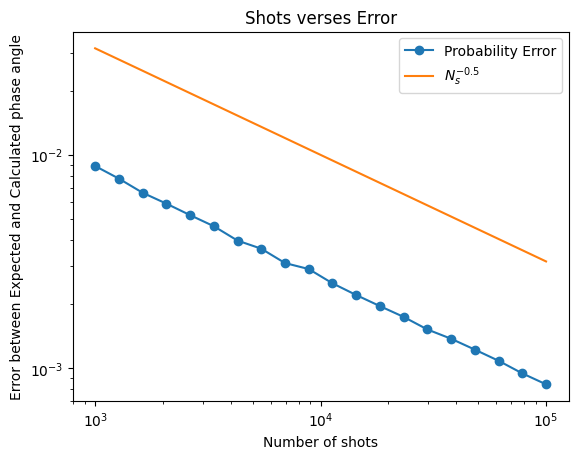

In [21]:
plt.loglog(trials, error_diff, label = 'Probability Error',marker='o')
plt.loglog(trials, Ns, label = '$N_s^{-0.5}$')
plt.title("Shots verses Error")
plt.xlabel("Number of shots")
plt.ylabel("Error between Expected and Calculated phase angle")
plt.legend(loc='upper right')
plt.show()